<a href="https://colab.research.google.com/github/Marianacr24/Proyecto_Final_DataExperiencia/blob/main/Proyecto_final_dataexperiencie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')   # te pedirá autorización; usa tu cuenta de Google
# path de ejemplo: /content/drive/MyDrive/Proyecto_Final/


Mounted at /content/drive


In [6]:
# Si subiste ZIP a /content
!unzip -q /content/Proyecto_Final_DataExperiencia_v2.zip -d /content/project
!ls -la /content/project

total 24
drwxr-xr-x 5 root root 4096 Sep 17 22:35 .
drwxr-xr-x 1 root root 4096 Sep 17 22:35 ..
drwxr-xr-x 2 root root 4096 Sep 15 23:47 data
drwxr-xr-x 2 root root 4096 Sep 15 23:47 notebooks
drwxr-xr-x 2 root root 4096 Sep 15 23:47 outputs
-rw-r--r-- 1 root root 1436 Sep 15 23:47 README.md


In [4]:
# instalar librerías (Colab suele tener las básicas, pero por si falta algo)
!pip install --quiet pandas matplotlib seaborn scikit-learn python-pptx


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 472.8/472.8 kB 21.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.3/175.3 kB 15.2 MB/s eta 0:00:00


In [16]:
# 1) Descomprimir el archivo ZIP del proyecto
import os

zip_file_path = 'Proyecto_Final_DataExperiencia_v2.zip'
if os.path.exists(zip_file_path):
    !unzip -q {zip_file_path}
    print(f"Archivo {zip_file_path} descomprimido.")
else:
    print(f"Error: Archivo {zip_file_path} no encontrado. Asegúrate de que el archivo ZIP esté subido a /content/.")

# 2) Ver los archivos dentro
!ls -la
!ls -la data

Error: Archivo Proyecto_Final_DataExperiencia_v2.zip no encontrado. Asegúrate de que el archivo ZIP esté subido a /content/.
total 24
drwxr-xr-x 5 root root 4096 Sep 17 22:35 .
drwxr-xr-x 1 root root 4096 Sep 17 22:35 ..
drwxr-xr-x 2 root root 4096 Sep 15 23:47 data
drwxr-xr-x 2 root root 4096 Sep 15 23:47 notebooks
drwxr-xr-x 3 root root 4096 Sep 17 22:36 outputs
-rw-r--r-- 1 root root 1436 Sep 15 23:47 README.md
total 64
drwxr-xr-x 2 root root  4096 Sep 15 23:47 .
drwxr-xr-x 5 root root  4096 Sep 17 22:35 ..
-rw-r--r-- 1 root root 48284 Sep 15 23:47 col_finclusion.csv
-rw-r--r-- 1 root root  6324 Sep 15 23:47 sfc_cartera.csv


In [8]:
# Bl0que que pegar o verificar en la parte superior del notebook
import os
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
%matplotlib inline

# Crear carpetas de salida
os.makedirs('outputs/figuras', exist_ok=True)
os.makedirs('data', exist_ok=True)
os.makedirs('outputs', exist_ok=True)


In [18]:
import pandas as pd

# Ajusta la ruta si tu archivo está en otra carpeta
df = pd.read_csv('data/sfc_cartera.csv')
print("Tamaño:", df.shape)
print("Columnas:", df.columns.tolist())
display(df.head())

Tamaño: (120, 6)
Columnas: ['fecha', 'modalidad', 'departamento', 'saldo_cartera', 'saldo_mora', 'genero']


,fecha,modalidad,departamento,saldo_cartera,saldo_mora,genero
0,2018-01-01,Consumo,Cundinamarca,35282725,214385,M
1,2018-01-01,Consumo,Bogota,97292002,143520,M
2,2018-01-01,Consumo,Antioquia,128021304,1274864,F
3,2018-01-01,Consumo,Valle del Cauca,115714649,800915,F
4,2018-01-01,Consumo,Santander,52010675,186293,M


In [31]:
resumen = pd.DataFrame({
    "Media": df_limpio[columnas_numericas].mean(),
    "Mediana": df_limpio[columnas_numericas].median(),
    "Desviacion Estandar": df_limpio[columnas_numericas].std()
}).round(2)


KeyError: "None of [Index(['monto_credito', 'interes', 'plazo_meses'], dtype='object')] are in the [columns]"

📊 Tabla Antes vs Después:
                Estado  Registros
0    Antes de limpieza       1000
1  Después de limpieza       1000

Columns in df_limpio: ['id', 'age', 'income', 'loan_amount', 'duration', 'installment', 'gender', 'department', 'default_flag']

📈 Tabla resumen de medidas estadísticas:
                  Media    Mediana  Desviacion Estandar
age               44.62       44.0                15.54
income       4168208.60  4141944.0           2226648.45
loan_amount  3316000.00  2000000.0           2846180.73
duration          24.79       24.0                14.86
installment   221426.55   104166.0            303135.05


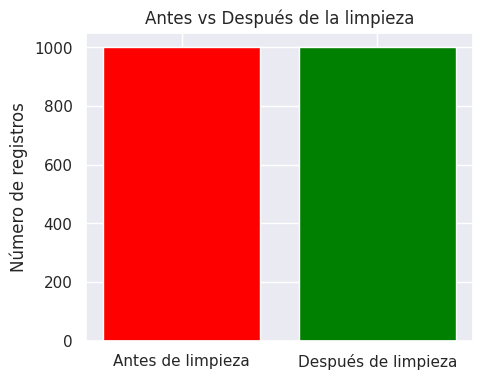

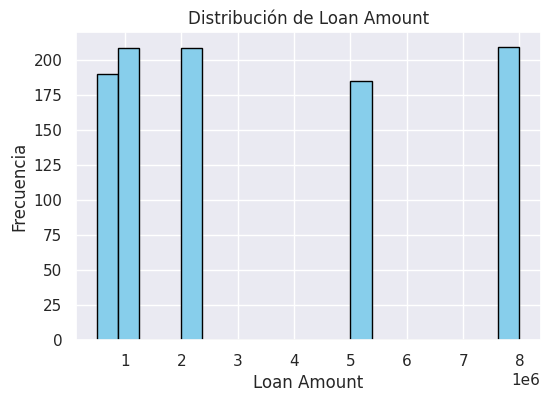

In [32]:
# ======================================
# Paso 1: Importar librerías necesarias
# ======================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ======================================
# Paso 2: Cargar tus datos
# (Asegúrate de subir tu archivo CSV a Colab o ajustar la ruta)
# ======================================
# Changed the file path to load col_finclusion.csv
df = pd.read_csv("data/col_finclusion.csv")

# ======================================
# Paso 3: Conteo de registros antes de la limpieza
# ======================================
registros_antes = len(df)

# Eliminar duplicados y valores nulos como ejemplo de limpieza
df_limpio = df.drop_duplicates().dropna()

# Conteo de registros después de la limpieza
registros_despues = len(df_limpio)

# Crear tabla Antes vs Después
tabla_comparacion = pd.DataFrame({
    "Estado": ["Antes de limpieza", "Después de limpieza"],
    "Registros": [registros_antes, registros_despues]
})
print("📊 Tabla Antes vs Después:")
print(tabla_comparacion)

# Print columns of df_limpio to identify correct column names
print("\nColumns in df_limpio:", df_limpio.columns.tolist())


# ======================================
# Paso 4: Calcular medidas estadísticas
# (ajusta las columnas a las de tu dataset)
# ======================================
# You will need to adjust these column names to match your dataset
columnas_numericas = ["age", "income", "loan_amount", "duration", "installment"]

resumen = pd.DataFrame({
    "Media": df_limpio[columnas_numericas].mean(),
    "Mediana": df_limpio[columnas_numericas].median(),
    "Desviacion Estandar": df_limpio[columnas_numericas].std()
}).round(2)

print("\n📈 Tabla resumen de medidas estadísticas:")
print(resumen)

# ======================================
# Paso 5: Visualizaciones rápidas
# ======================================

# Gráfico Antes vs Después
plt.figure(figsize=(5,4))
plt.bar(tabla_comparacion["Estado"], tabla_comparacion["Registros"], color=["red","green"])
plt.title("Antes vs Después de la limpieza")
plt.ylabel("Número de registros")
plt.show()

# Histograma of a numeric column - adjust column name
# You will need to adjust this column name to match your dataset
plt.figure(figsize=(6,4))
plt.hist(df_limpio["loan_amount"], bins=20, color="skyblue", edgecolor="black")
plt.title("Distribución de Loan Amount")
plt.xlabel("Loan Amount")
plt.ylabel("Frecuencia")
plt.show()

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [20]:
import os
print("Files in the data directory:")
!ls -la data

Files in the data directory:
total 64
drwxr-xr-x 2 root root  4096 Sep 15 23:47 .
drwxr-xr-x 5 root root  4096 Sep 17 22:35 ..
-rw-r--r-- 1 root root 48284 Sep 15 23:47 col_finclusion.csv
-rw-r--r-- 1 root root  6324 Sep 15 23:47 sfc_cartera.csv


In [21]:
import os
os.makedirs('outputs/figuras', exist_ok=True)
print("Carpeta outputs/figuras preparada")

Carpeta outputs/figuras preparada


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Vamos a crear un gráfico rápido con los datos si existe la columna monto_credito
col = 'monto_credito'  # cámbialo si tu columna tiene otro nombre
if col in df.columns:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col].dropna(), bins=30, kde=True)
    plt.title("Histograma de prueba - " + col)
    plt.tight_layout()
    plt.show()
else:
    print(f"No se encontró la columna {col}. Columnas disponibles: {df.columns.tolist()}")


No se encontró la columna monto_credito. Columnas disponibles: ['fecha', 'modalidad', 'departamento', 'saldo_cartera', 'saldo_mora', 'genero']


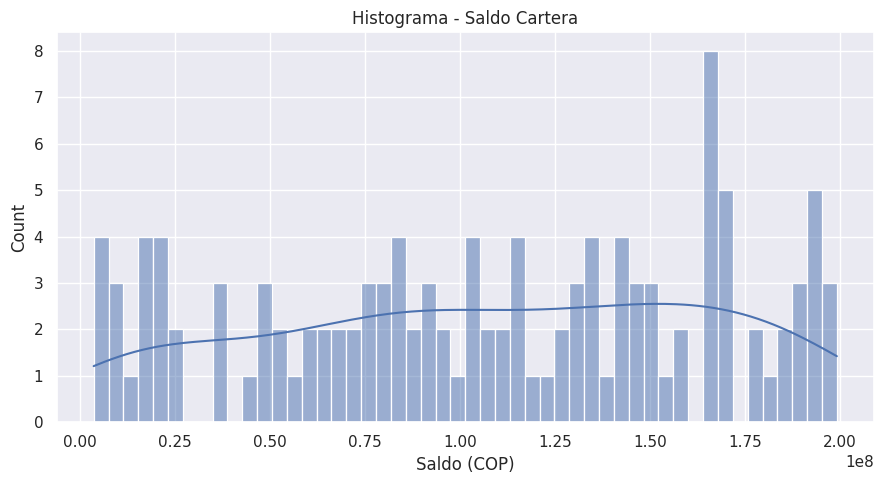

Guardado: outputs/figuras/hist_saldo_cartera.png


In [23]:
col = 'saldo_cartera'  # reemplaza si tu columna se llama diferente
import matplotlib.pyplot as plt, seaborn as sns
sns.set()

plt.figure(figsize=(9,5))
sns.histplot(df[col].dropna(), bins=50, kde=True)
plt.title('Histograma - Saldo Cartera')
plt.xlabel('Saldo (COP)')
plt.tight_layout()
plt.savefig('outputs/figuras/hist_saldo_cartera.png', dpi=150, bbox_inches='tight')
plt.show()
print("Guardado: outputs/figuras/hist_saldo_cartera.png")

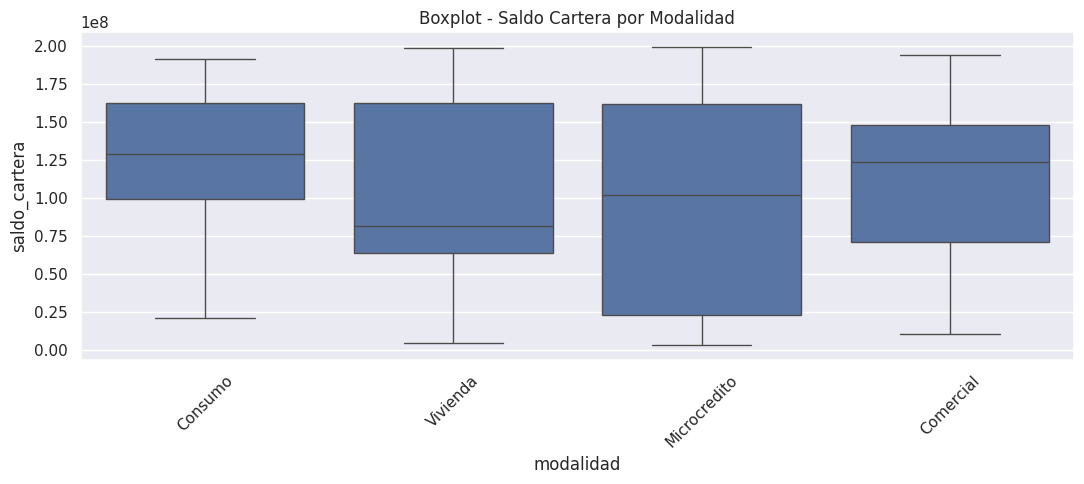

Guardado: outputs/figuras/box_saldo_cartera_modalidad.png


In [24]:
col_mod = 'modalidad'      # reemplaza si tiene otro nombre
col_val = 'saldo_cartera'  # reemplaza si hace falta

plt.figure(figsize=(11,5))
sns.boxplot(x=col_mod, y=col_val, data=df)
plt.title('Boxplot - Saldo Cartera por Modalidad')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('outputs/figuras/box_saldo_cartera_modalidad.png', dpi=150, bbox_inches='tight')
plt.show()
print("Guardado: outputs/figuras/box_saldo_cartera_modalidad.png")

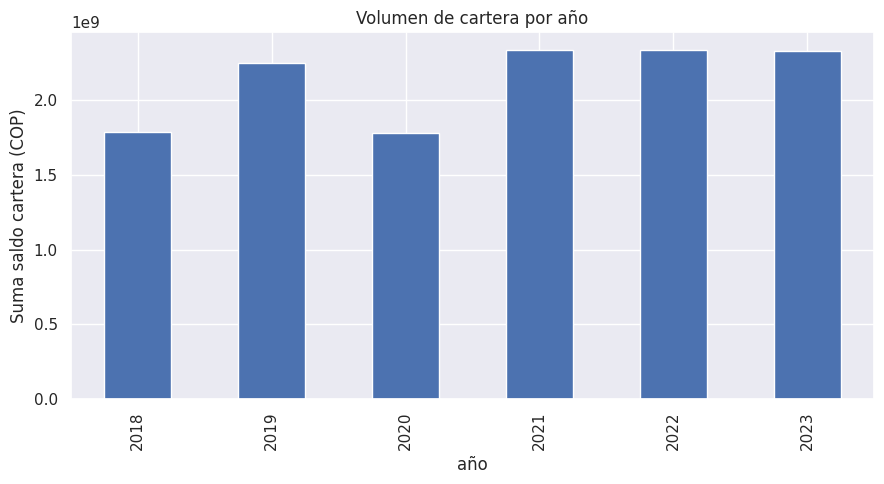

Guardado: outputs/figuras/evolucion_anio.png


In [26]:
# Asegúrate de que la columna fecha exista y esté en formato fecha
date_col = 'fecha'  # cambia si se llama distinto
val_col = 'saldo_cartera' # Changed from 'monto_credito' to 'saldo_cartera'
if date_col in df.columns:
    df[date_col] = pd.to_datetime(df[date_col], errors='coerce')
    df['año'] = df[date_col].dt.year
    plt.figure(figsize=(9,5))
    df.groupby('año')[val_col].sum().plot(kind='bar')
    plt.title('Volumen de cartera por año') # Updated title
    plt.ylabel('Suma saldo cartera (COP)') # Updated ylabel
    plt.tight_layout()
    plt.savefig('outputs/figuras/evolucion_anio.png', dpi=150, bbox_inches='tight')
    plt.show()
    print("Guardado: outputs/figuras/evolucion_anio.png")
else:
    print(f"No existe la columna {date_col}. Columnas: {df.columns.tolist()}")

In [27]:
!ls -la outputs/figuras

total 148
drwxr-xr-x 2 root root  4096 Sep 17 22:44 .
drwxr-xr-x 3 root root  4096 Sep 17 22:36 ..
-rw-r--r-- 1 root root 58323 Sep 17 22:44 box_saldo_cartera_modalidad.png
-rw-r--r-- 1 root root 34097 Sep 17 22:45 evolucion_anio.png
-rw-r--r-- 1 root root 42341 Sep 17 22:43 hist_saldo_cartera.png


In [28]:
!zip -r resultados_graficas.zip outputs/figuras
from google.colab import files
files.download('resultados_graficas.zip')

  adding: outputs/figuras/ (stored 0%)
  adding: outputs/figuras/hist_saldo_cartera.png (deflated 17%)
  adding: outputs/figuras/evolucion_anio.png (deflated 25%)
  adding: outputs/figuras/box_saldo_cartera_modalidad.png (deflated 21%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>